In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('Prostate_Cancer.csv')
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [3]:
df
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [4]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50000,29.011492,1.000,25.7500,50.5000,75.250,100.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


In [5]:

# Define the number of augmented samples you want to create
num_augmented_samples = 1000  # Adjust this as needed

# Initialize an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Define the range for random data modification
# You can adjust these ranges as needed
radius_range = (-5, 5)
texture_range = (-5, 5)
perimeter_range = (-10, 10)
area_range = (-100, 100)
smoothness_range = (-0.02, 0.02)
compactness_range = (-0.02, 0.02)
symmetry_range = (-0.02, 0.02)
fractal_dimension_range = (-0.01, 0.01)

for _ in range(num_augmented_samples):
    # Randomly select an existing row to modify
    original_row = df.sample(1)

    # Create a new row with random modifications
    augmented_row = original_row.copy()
    augmented_row['radius'] += np.random.uniform(*radius_range)
    augmented_row['texture'] += np.random.uniform(*texture_range)
    augmented_row['perimeter'] += np.random.uniform(*perimeter_range)
    augmented_row['area'] += np.random.uniform(*area_range)
    augmented_row['smoothness'] += np.random.uniform(*smoothness_range)
    augmented_row['compactness'] += np.random.uniform(*compactness_range)
    augmented_row['symmetry'] += np.random.uniform(*symmetry_range)
    augmented_row['fractal_dimension'] += np.random.uniform(*fractal_dimension_range)

    # Append the augmented row to the new DataFrame
    augmented_data = pd.concat([augmented_data, augmented_row], ignore_index=True)

# Concatenate the original data and the augmented data
augmented_dataset = pd.concat([df, augmented_data], ignore_index=True)

augmented_dataset

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23.000000,12.000000,151.000000,954.000000,0.143000,0.278000,0.242000,0.079000
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
2,3,M,21.000000,27.000000,130.000000,1203.000000,0.125000,0.160000,0.207000,0.060000
3,4,M,14.000000,16.000000,78.000000,386.000000,0.070000,0.284000,0.260000,0.097000
4,5,M,9.000000,19.000000,135.000000,1297.000000,0.141000,0.133000,0.181000,0.059000
...,...,...,...,...,...,...,...,...,...,...
1095,75,B,17.962142,8.292585,73.923444,404.392981,0.091069,0.063730,0.179393,0.053736
1096,41,M,24.924516,15.643282,84.448029,563.274608,0.096047,0.053091,0.181480,0.053631
1097,53,B,21.831366,13.346373,67.931811,505.431504,0.079548,0.051364,0.178283,0.057239
1098,9,M,19.773610,22.362359,81.853711,487.609875,0.123189,0.209295,0.237565,0.066275


In [6]:
for col in augmented_dataset.columns:
    print(f"Unique values in column '{col}': {augmented_dataset[col].unique()}")

Unique values in column 'id': [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100]
Unique values in column 'diagnosis_result': ['M' 'B']
Unique values in column 'radius': [23.          9.         21.         ... 21.83136629 19.77360988
 24.12243454]
Unique values in column 'texture': [12.         13.         27.         ... 13.346373   22.36235912
  9.58386628]
Unique values in column 'perimeter': [151.         133.         130.         ...  67.93181124  81.85371125
  93.06779838]
Unique values in column 'area': [ 954.         1326.         1203.         ...  505.43150375  487.60987526
  463.84634795]
Unique values in column 'smoothness': [0.143      0.125      0.07       ... 0.07954768 0.12318903 0.11442994]
Unique values in column 'compactness

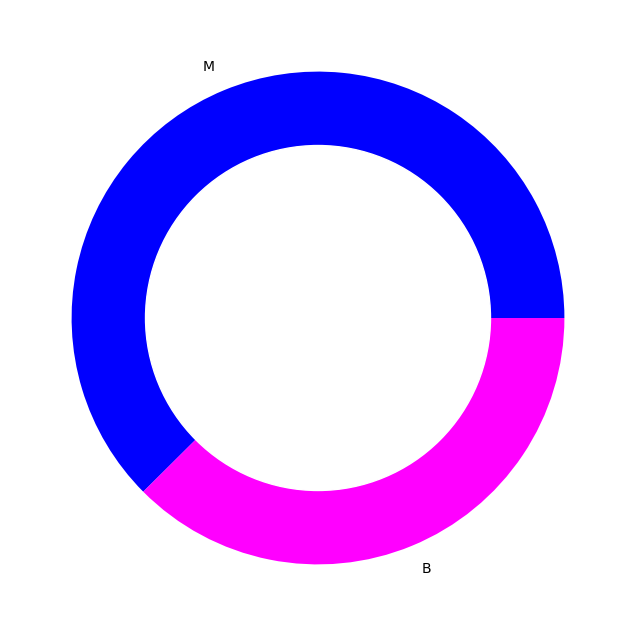

In [7]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(augmented_dataset.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [8]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = augmented_dataset[augmented_dataset['diagnosis_result'] == 'M']
data_2 = augmented_dataset[augmented_dataset['diagnosis_result'] == 'B']

data_2

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
5,6,B,25.000000,25.000000,83.000000,477.000000,0.128000,0.170000,0.209000,0.076000
12,13,B,14.000000,15.000000,132.000000,1123.000000,0.097000,0.246000,0.240000,0.078000
19,20,B,17.000000,11.000000,87.000000,566.000000,0.098000,0.081000,0.189000,0.058000
20,21,B,16.000000,14.000000,86.000000,520.000000,0.108000,0.127000,0.197000,0.068000
...,...,...,...,...,...,...,...,...,...,...
1088,53,B,26.379932,17.140687,66.596409,503.173294,0.069099,0.039419,0.194197,0.062384
1090,56,B,15.212091,12.184636,79.919674,359.525259,0.110998,0.042866,0.191739,0.056145
1094,56,B,14.667983,8.691736,67.164916,362.197000,0.114609,0.070059,0.194163,0.058310
1095,75,B,17.962142,8.292585,73.923444,404.392981,0.091069,0.063730,0.179393,0.053736


In [9]:
augmented_dataset.shape

(1100, 10)

In [10]:
1100 / 2

550.0

In [11]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=550, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=550, 
                           random_state=123, replace=True)



print(data_1)
print(data_2_resample)

augmented_dataset = pd.concat([data_1_resample, data_2_resample])


augmented_dataset

      id diagnosis_result     radius    texture   perimeter         area   
0      1                M  23.000000  12.000000  151.000000   954.000000  \
2      3                M  21.000000  27.000000  130.000000  1203.000000   
3      4                M  14.000000  16.000000   78.000000   386.000000   
4      5                M   9.000000  19.000000  135.000000  1297.000000   
6      7                M  16.000000  26.000000  120.000000  1040.000000   
...   ..              ...        ...        ...         ...          ...   
1092   8                M  11.330933  14.715874   90.469669   543.858235   
1093   1                M  27.877280  16.434890  158.108348   885.494859   
1096  41                M  24.924516  15.643282   84.448029   563.274608   
1098   9                M  19.773610  22.362359   81.853711   487.609875   
1099  48                M  24.122435   9.583866   93.067798   463.846348   

      smoothness  compactness  symmetry  fractal_dimension  
0       0.143000     0.278

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
828,39,M,12.411760,19.192799,104.083268,764.214625,0.105249,0.053126,0.156797,0.049721
589,54,M,13.649997,30.598800,128.664190,1125.235062,0.097592,0.162088,0.216877,0.062896
614,3,M,23.556148,27.989849,136.056116,1219.106352,0.122621,0.174283,0.200089,0.057598
523,23,M,16.905316,25.314949,95.849192,777.209822,0.104885,0.219721,0.243286,0.064465
152,33,M,18.242169,13.414610,103.593671,989.537893,0.116466,0.164040,0.225199,0.073862
...,...,...,...,...,...,...,...,...,...,...
183,90,B,14.669337,27.130896,100.815959,635.666023,0.106508,0.135608,0.208798,0.070792
235,70,B,21.258278,23.152511,71.295992,595.115375,0.081447,0.064118,0.173415,0.050545
50,51,B,19.000000,25.000000,75.000000,428.000000,0.086000,0.050000,0.150000,0.059000
654,6,B,21.525132,21.158077,75.111779,409.041323,0.113412,0.150773,0.197354,0.078586


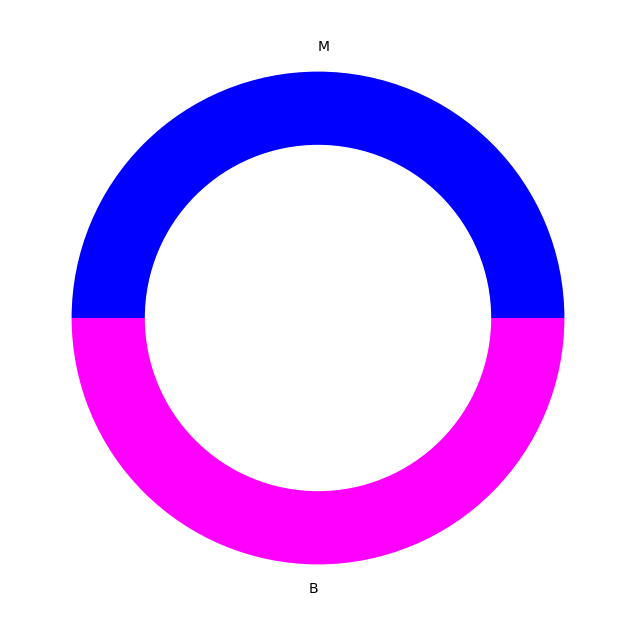

In [12]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(augmented_dataset.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [13]:
augmented_dataset['diagnosis_result'] = augmented_dataset['diagnosis_result'].replace({'M': 1, 'B': 0})


                   diagnosis_result
id                        -0.353094
diagnosis_result           1.000000
radius                    -0.190320
texture                    0.016668
perimeter                  0.625731
area                       0.582619
smoothness                 0.166836
compactness                0.550567
symmetry                   0.291251
fractal_dimension          0.031380


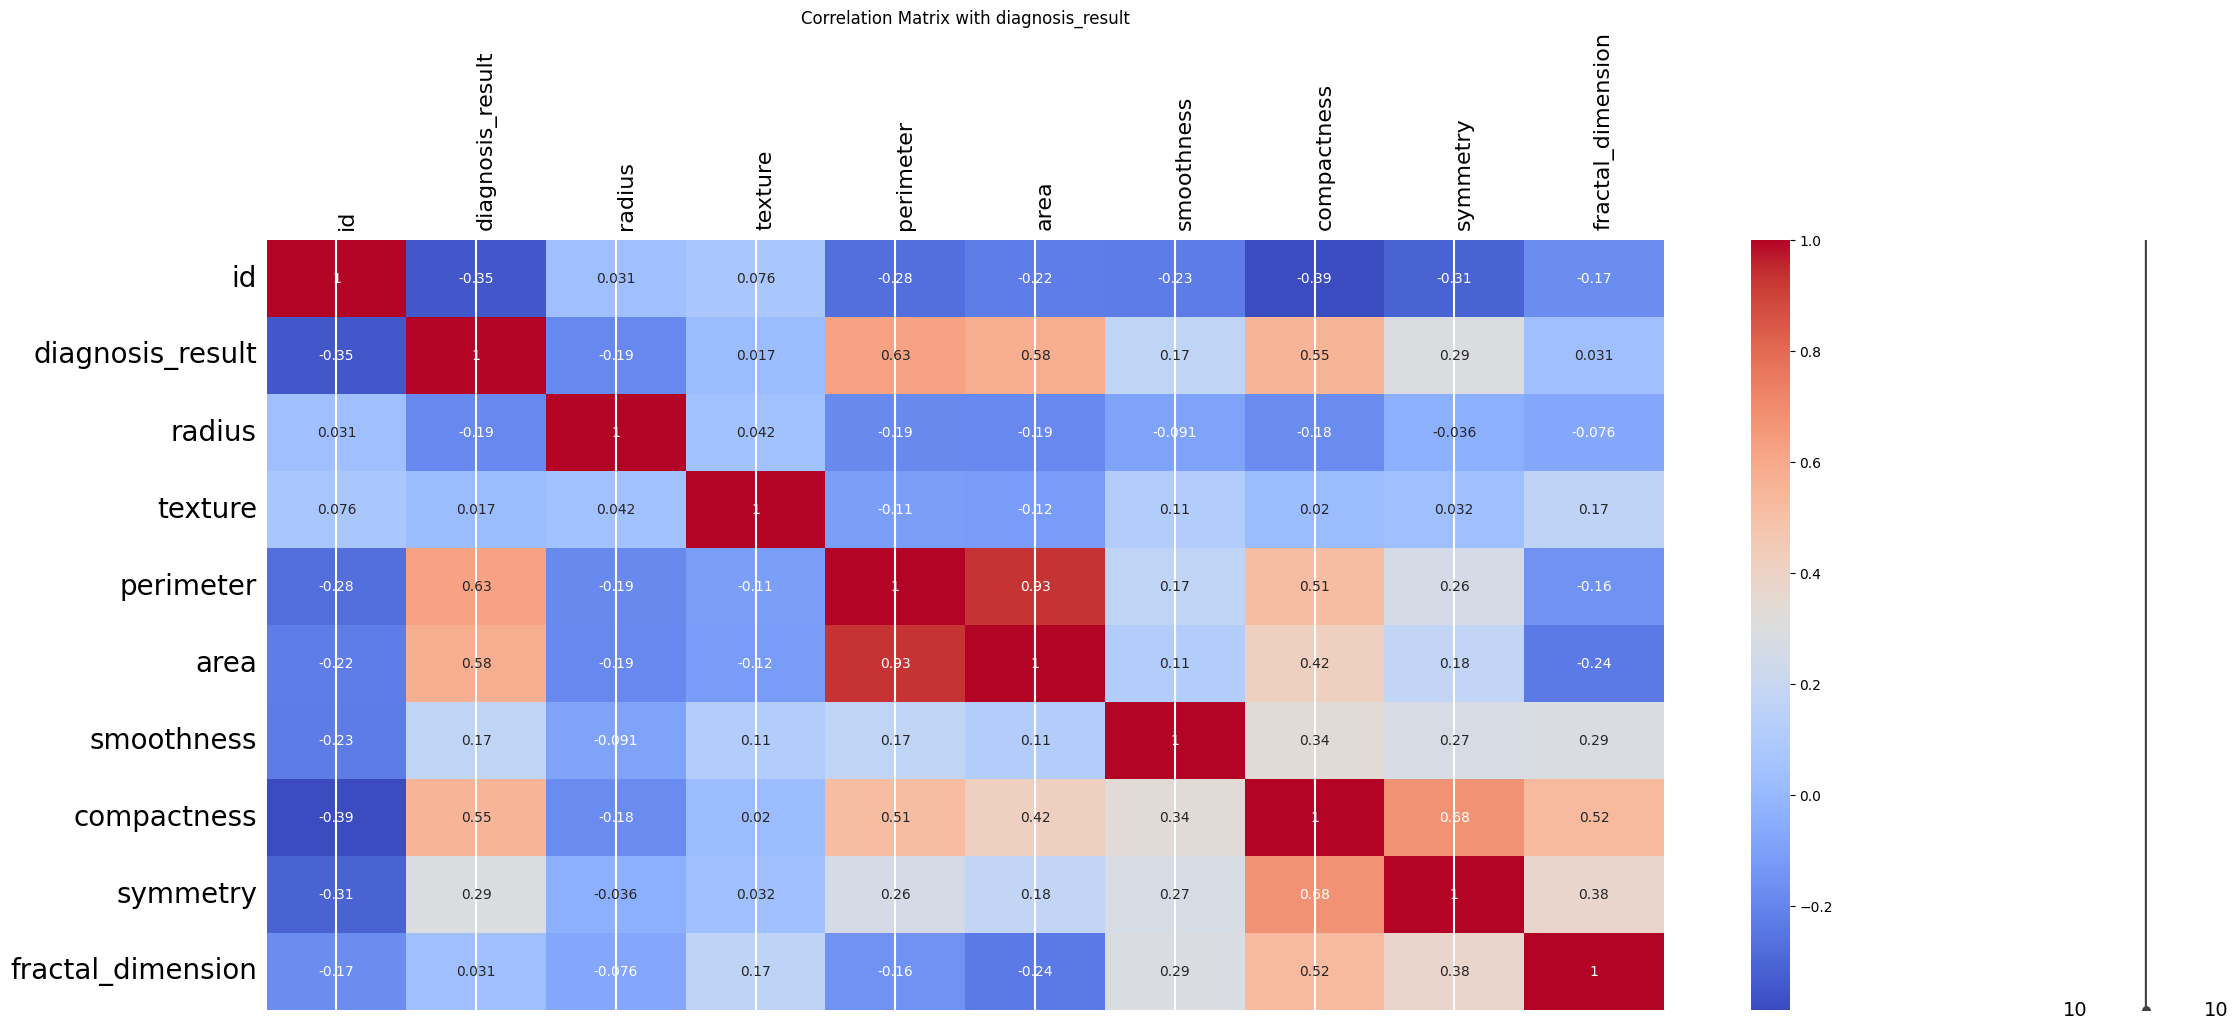

In [14]:
msno.matrix(augmented_dataset)

chosen_column = "diagnosis_result" 

# for col in augmented_dataset.columns:
#     if col != chosen_column:
#         plt.scatter(augmented_dataset[chosen_column], augmented_dataset[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = augmented_dataset.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

In [15]:
augmented_dataset.drop('compactness', axis=1, inplace=True)


In [16]:
# checking for some null, missing or NaN values
augmented_dataset.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

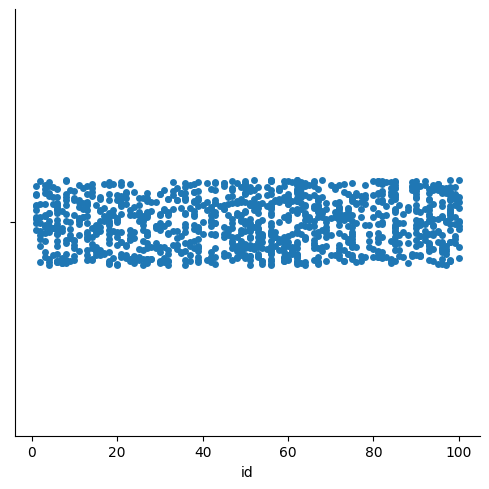

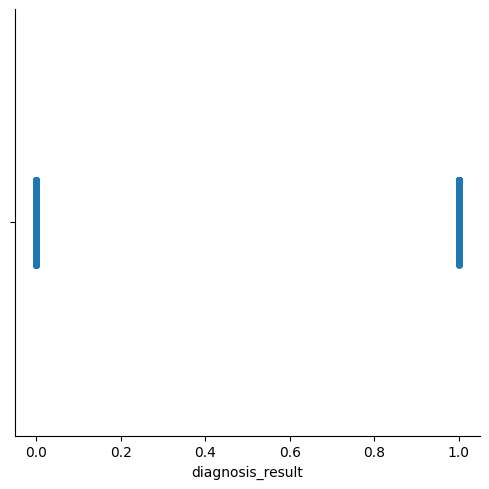

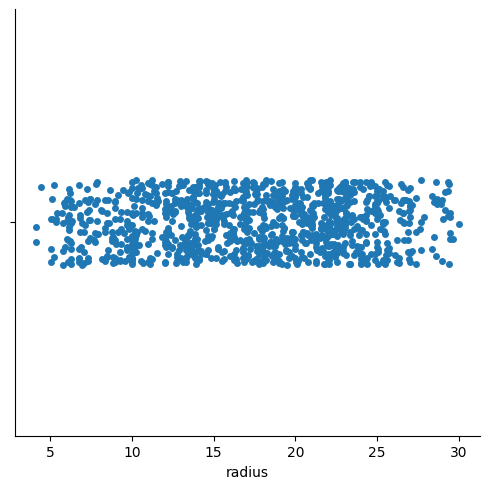

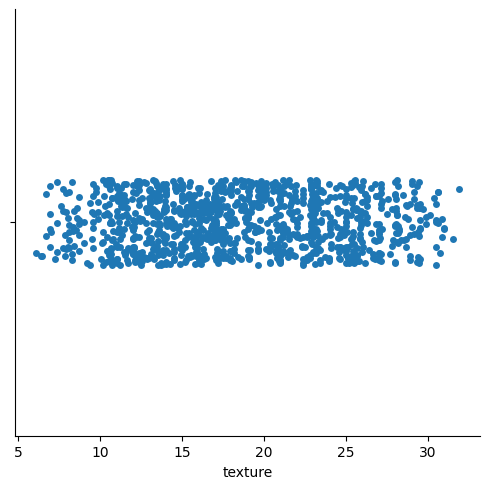

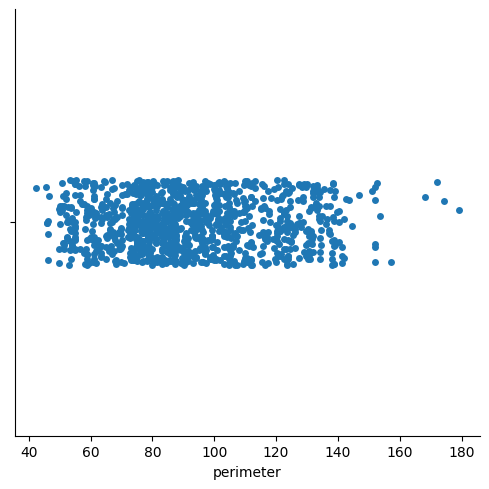

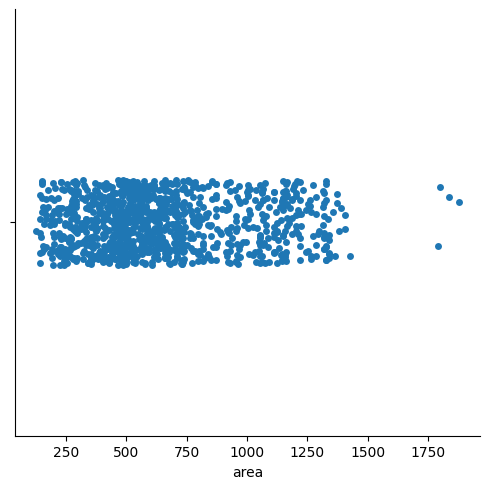

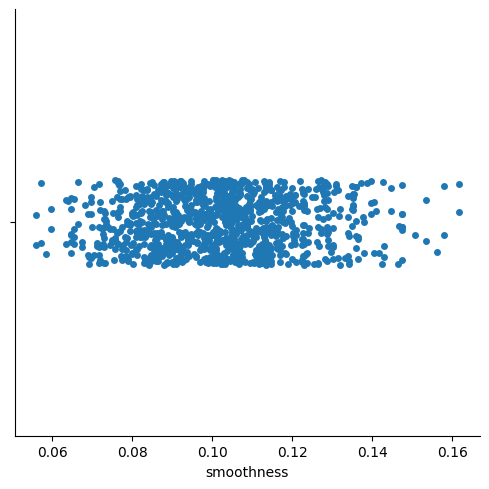

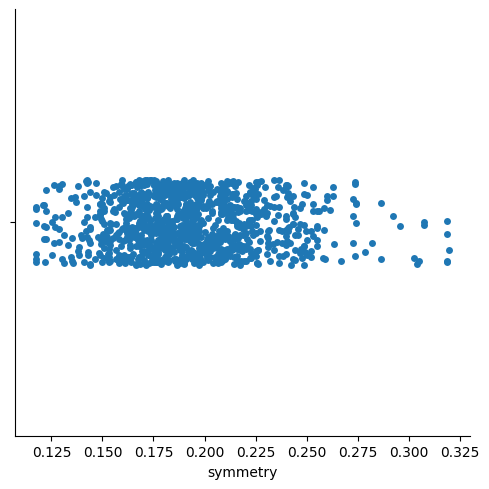

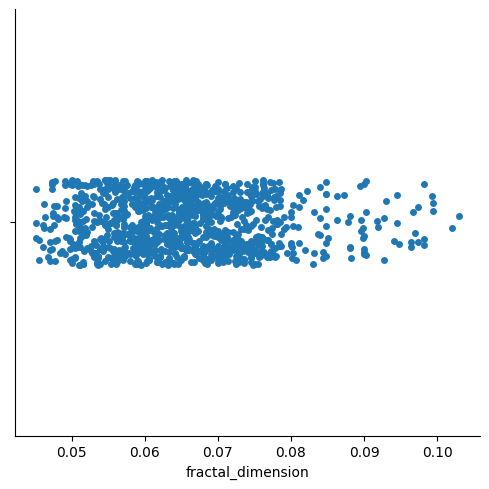

In [17]:
# cgecking for some outliers in dataset
# sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

for col in augmented_dataset.columns:
    sns.catplot(x = col, data = augmented_dataset)

In [18]:



ls = ["area", "smoothness", "symmetry", "fractal_dimension"]

for i in ls:
#     column_name = f'{i}'
    print(augmented_dataset[i].mean())
    print(augmented_dataset[i].std())
    new_column_name = f'{i}_zscore'
    augmented_dataset[new_column_name] = ( augmented_dataset[i] - augmented_dataset[i].mean() ) / augmented_dataset[i].std()
augmented_dataset.head()

639.2856069705069
308.7638680714246
0.1019414481286228
0.018021273306403705
0.1922456298445717
0.032645091853268415
0.06519656864475813
0.01020952526587057


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension,area_zscore,smoothness_zscore,symmetry_zscore,fractal_dimension_zscore
828,39,1,12.411760,19.192799,104.083268,764.214625,0.105249,0.156797,0.049721,0.404610,0.183539,-1.085864,-1.515759
589,54,1,13.649997,30.598800,128.664190,1125.235062,0.097592,0.216877,0.062896,1.573855,-0.241342,0.754528,-0.225321
614,3,1,23.556148,27.989849,136.056116,1219.106352,0.122621,0.200089,0.057598,1.877878,1.147499,0.240264,-0.744221
523,23,1,16.905316,25.314949,95.849192,777.209822,0.104885,0.243286,0.064465,0.446698,0.163320,1.563505,-0.071639
152,33,1,18.242169,13.414610,103.593671,989.537893,0.116466,0.225199,0.073862,1.134369,0.805940,1.009456,0.848792


In [19]:
ls2 = ["area_zscore", "smoothness_zscore", "symmetry_zscore", "fractal_dimension_zscore"]

for i in ls2:
    print(augmented_dataset[augmented_dataset[i]>3])

      id  diagnosis_result     radius    texture   perimeter         area   
176   83                 1  10.272884  12.784019  179.091343  1801.219464  \
548   83                 1   8.944140  11.303493  174.158892  1790.094506   
82    83                 1  10.000000  15.000000  172.000000  1878.000000   
1042  83                 1   6.814054  10.739975  168.018905  1835.374649   

      smoothness  symmetry  fractal_dimension  area_zscore  smoothness_zscore   
176     0.086031  0.190956           0.059480     3.763179          -0.882868  \
548     0.104718  0.198259           0.058785     3.727149           0.154075   
82      0.106000  0.183000           0.068000     4.011850           0.225209   
1042    0.111664  0.192288           0.072318     3.873799           0.539516   

      symmetry_zscore  fractal_dimension_zscore  
176         -0.039512                 -0.559912  
548          0.184215                 -0.628008  
82          -0.283217                  0.274590  
1042    

In [20]:
 #data which have standard deviation high than 3 or lower -3 are always outliers. (sometimes it can be 2.3 or 2.5 also possible in place of 3, sometimes 4 is also possible, it depends on dataset)

for i in ls2:
    print(augmented_dataset[augmented_dataset[i]< -3])

Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []


In [21]:


for i in ls2:
    print(augmented_dataset[(augmented_dataset[i]<-3) | (augmented_dataset[i]>3)]) #This all are otliers

      id  diagnosis_result     radius    texture   perimeter         area   
176   83                 1  10.272884  12.784019  179.091343  1801.219464  \
548   83                 1   8.944140  11.303493  174.158892  1790.094506   
82    83                 1  10.000000  15.000000  172.000000  1878.000000   
1042  83                 1   6.814054  10.739975  168.018905  1835.374649   

      smoothness  symmetry  fractal_dimension  area_zscore  smoothness_zscore   
176     0.086031  0.190956           0.059480     3.763179          -0.882868  \
548     0.104718  0.198259           0.058785     3.727149           0.154075   
82      0.106000  0.183000           0.068000     4.011850           0.225209   
1042    0.111664  0.192288           0.072318     3.873799           0.539516   

      symmetry_zscore  fractal_dimension_zscore  
176         -0.039512                 -0.559912  
548          0.184215                 -0.628008  
82          -0.283217                  0.274590  
1042    

In [22]:
   
df2 = augmented_dataset[(augmented_dataset.area_zscore>-3) & (augmented_dataset.area_zscore<3) & (augmented_dataset.smoothness_zscore>-3) & (augmented_dataset.smoothness_zscore<3) & (augmented_dataset.symmetry_zscore>-3) & (augmented_dataset.symmetry_zscore<3) & (augmented_dataset.fractal_dimension_zscore>-3) & (augmented_dataset.fractal_dimension_zscore<3)]
df2

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension,area_zscore,smoothness_zscore,symmetry_zscore,fractal_dimension_zscore
828,39,1,12.411760,19.192799,104.083268,764.214625,0.105249,0.156797,0.049721,0.404610,0.183539,-1.085864,-1.515759
589,54,1,13.649997,30.598800,128.664190,1125.235062,0.097592,0.216877,0.062896,1.573855,-0.241342,0.754528,-0.225321
614,3,1,23.556148,27.989849,136.056116,1219.106352,0.122621,0.200089,0.057598,1.877878,1.147499,0.240264,-0.744221
523,23,1,16.905316,25.314949,95.849192,777.209822,0.104885,0.243286,0.064465,0.446698,0.163320,1.563505,-0.071639
152,33,1,18.242169,13.414610,103.593671,989.537893,0.116466,0.225199,0.073862,1.134369,0.805940,1.009456,0.848792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,90,0,14.669337,27.130896,100.815959,635.666023,0.106508,0.208798,0.070792,-0.011723,0.253377,0.507027,0.548029
235,70,0,21.258278,23.152511,71.295992,595.115375,0.081447,0.173415,0.050545,-0.143055,-1.137245,-0.576833,-1.435050
50,51,0,19.000000,25.000000,75.000000,428.000000,0.086000,0.150000,0.059000,-0.684295,-0.884591,-1.294088,-0.606940
654,6,0,21.525132,21.158077,75.111779,409.041323,0.113412,0.197354,0.078586,-0.745697,0.636481,0.156477,1.311450


In [23]:
df2.shape

(1065, 13)

In [24]:
augmented_dataset.shape[0] - df2.shape[0]

35

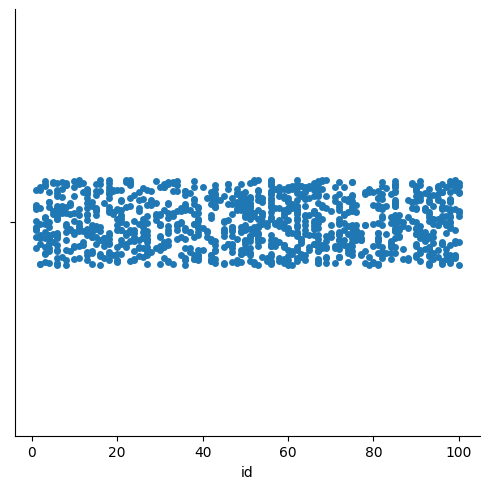

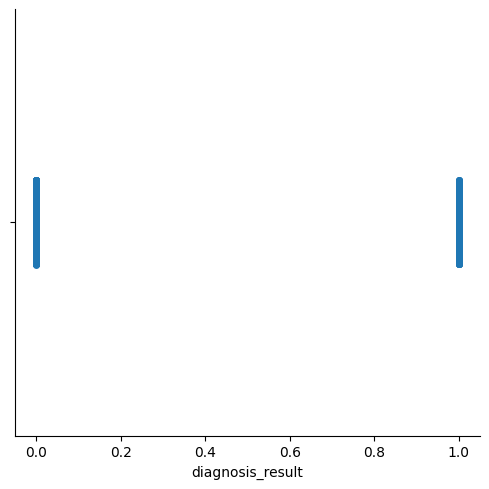

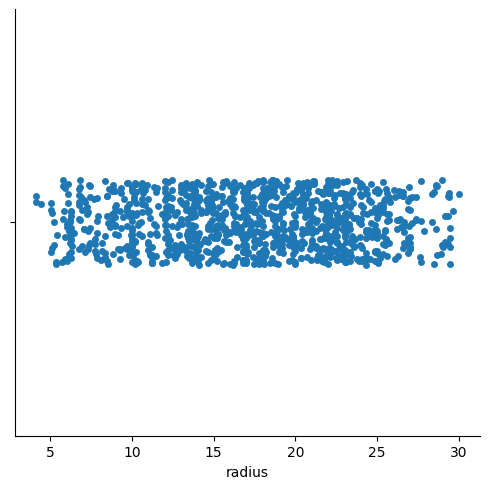

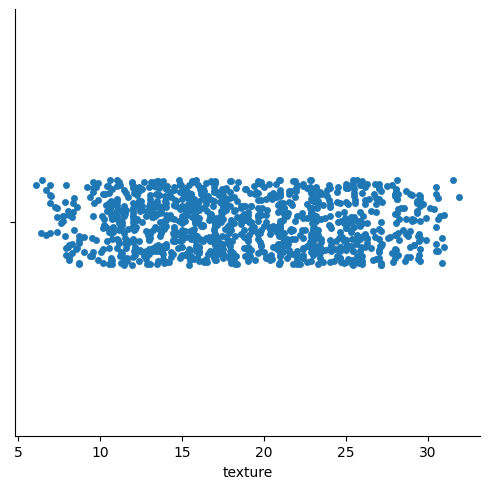

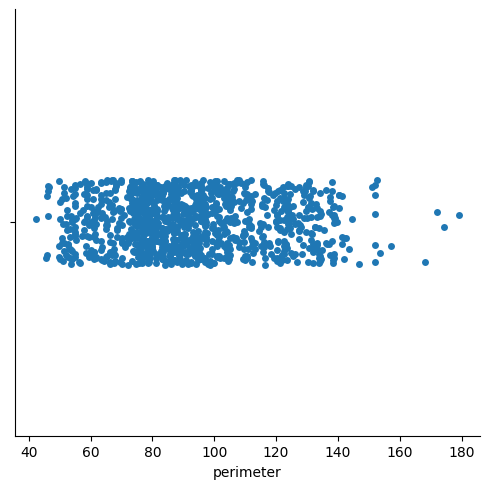

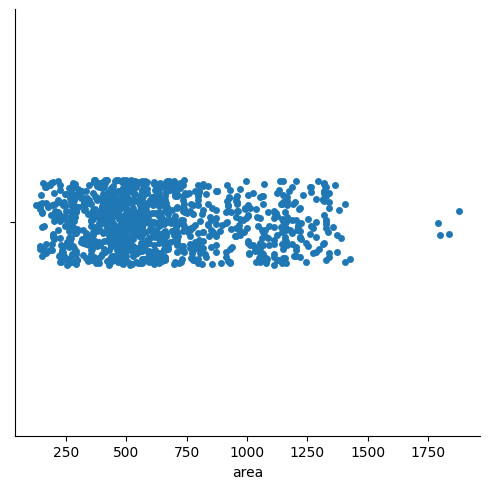

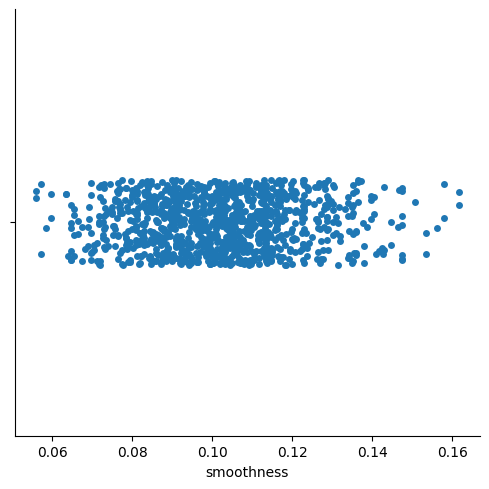

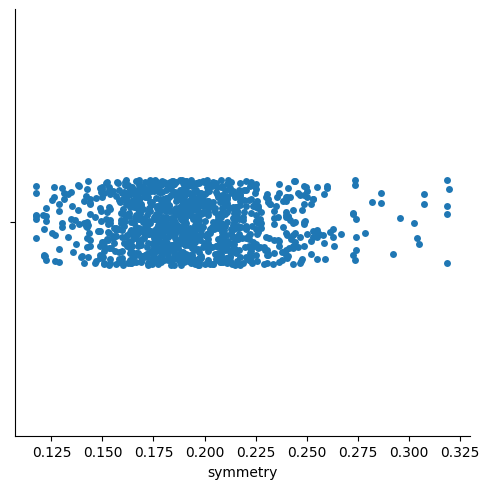

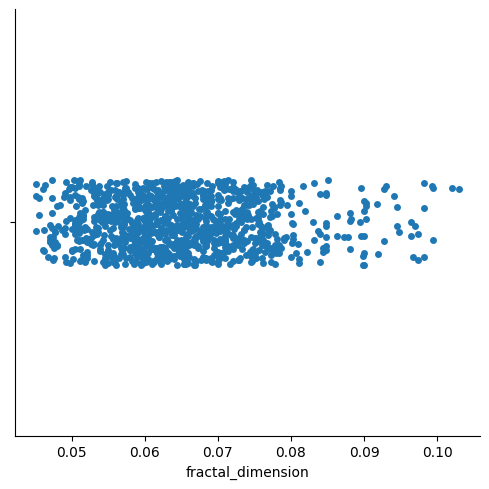

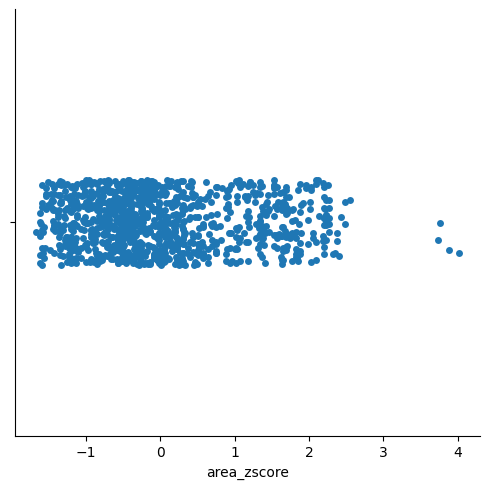

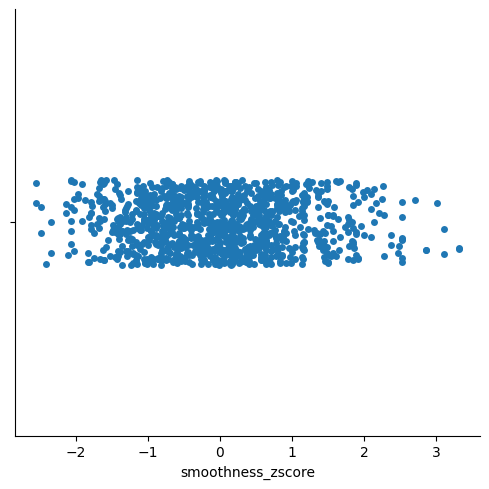

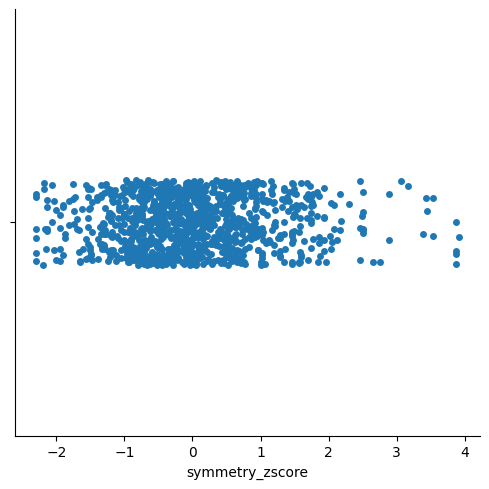

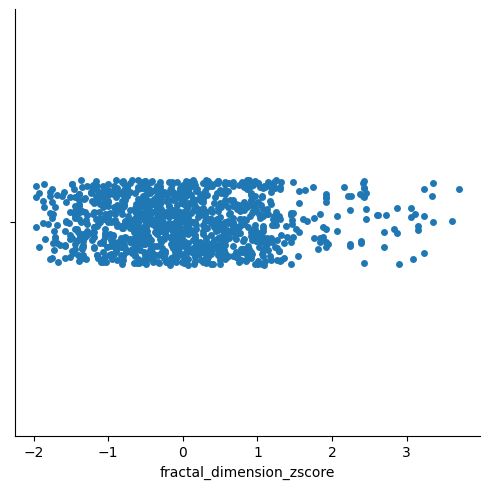

In [25]:
# cgecking for some outliers in dataset
# sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

for col in augmented_dataset.columns:
    sns.catplot(x = col, data = augmented_dataset)

In [26]:
del df2["area_zscore"]
del df2["smoothness_zscore"]
del df2["symmetry_zscore"]
del df2["fractal_dimension_zscore"]

In [27]:
### Independent and Dependent features
X=df2.iloc[:,2:]
y=df2.iloc[:,1]

In [28]:
X.head()

,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension
828,12.411760,19.192799,104.083268,764.214625,0.105249,0.156797,0.049721
589,13.649997,30.598800,128.664190,1125.235062,0.097592,0.216877,0.062896
614,23.556148,27.989849,136.056116,1219.106352,0.122621,0.200089,0.057598
523,16.905316,25.314949,95.849192,777.209822,0.104885,0.243286,0.064465
152,18.242169,13.414610,103.593671,989.537893,0.116466,0.225199,0.073862


In [29]:
y.head(20)

828     1
589     1
614     1
523     1
152     1
23      1
168     1
208     1
358     1
147     1
185     1
1022    1
70      1
111     1
872     1
370     1
180     1
658     1
550     1
416     1
Name: diagnosis_result, dtype: int64

In [30]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

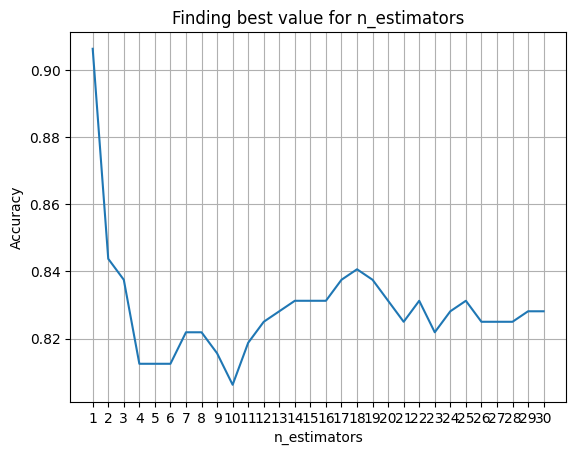

Highest value:  0.90625


In [34]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))])
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter ranges
n_neighbors_range = range(5, 31)
metric_options = ['euclidean', 'manhattan']
weights_options = ['uniform', 'distance', 'inverse_distance']

# Create parameter grid
param_grid = dict(n_neighbors=n_neighbors_range, metric=metric_options, weights=weights_options)

# Create KNN model and grid search object
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best parameters:', best_params)
# print('Best accuracy:', best_accuracy)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
260 fits failed out of a total of 780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')

In [89]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [90]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [91]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [92]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [93]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [94]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 82.1875
K Nearest neighbors: 89.6875
Support Vector Classifier: 82.8125
Naive Bayes: 80.3125
Decision tree: 92.8125
Random Forest: 93.125


In [87]:
ls = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor]
ls_model = [logreg, knn, svc, nb, dectree, ranfor]

BestFitIndex = ls.index(max(ls))
BestFitModelName = ls_model[BestFitIndex]
BestFitModelName

RandomForestClassifier()

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = BestFitModelName.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[153,  12],
       [ 10, 145]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

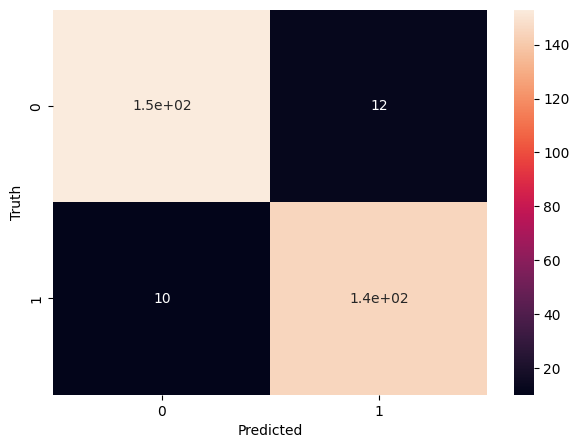

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       165
           1       0.92      0.94      0.93       155

    accuracy                           0.93       320
   macro avg       0.93      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320



In [46]:
#Creating a pickle file for making an API

pickle_out = open("Prostate_Cancer.pkl","wb")
pickle.dump(BestFitModelName, pickle_out)
pickle_out.close()